In [75]:
import cv2
img = cv2.imread('F:/CST17020/python/ImageProcessingProject/my extra works/id/5.jpg')
img = cv2.resize(img,(1029,644))
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

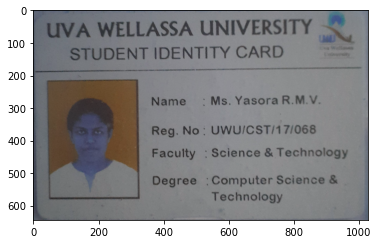

In [76]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [77]:
import numpy as np
width,height= 950,580
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# pts1 = np.float32([[540,220],[950,220],[540,580],[950,580]])
# pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])

# matrix1=cv2.getPerspectiveTransform(pts1, pts2)

# imgId=cv2.warpPerspective(img,matrix1,(width,height))
# gray1 = cv2.cvtColor(imgId,cv2.COLOR_BGR2GRAY)

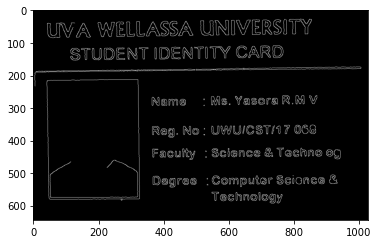

In [78]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
ed = cv2.cvtColor(edged, cv2.COLOR_BGR2RGB)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [82]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = 'F:\\Program Files\\Tesseract-OCR\\tesseract.exe'

ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
  

rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
  
# Appplying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
  
# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, 
                                                 cv2.CHAIN_APPROX_NONE)
  
# Creating a copy of image
# imI = imgId.copy()
im2 = img.copy()
  
# A text file is created and flushed
# file = open("recognized.txt", "w+")
# file.write("")
# file.close()
  
# Looping through the identified contours
# Then rectangular part is cropped and passed on
# to pytesseract for extracting text from it
# Extracted text is then written into the text file
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    x, y, w, h =540,220,950,580
      
    # Drawing a rectangle on copied image
    rect = cv2.rectangle(gray, (x, y), (x + w, y + h), (0, 255, 0), 2)
      
    # Cropping the text block for giving input to OCR
    cropped = gray[y:y + h, x:x + w]
      
    # Open the file in append mode
#     file = open("recognized.txt", "a")
      
    # Apply OCR on the cropped image
    text = pytesseract.image_to_string(cropped, config='--oem 2 --psm 6')
print(text)
# print(text)
#     Appending the text into file
#     file.write(text)
#     file.write("\n")
      
#     Close the file
#     file.close
# cv2.imshow('image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


Ms. Yasora R.M.V.
UWU/CST/17/068
Science & Technology
Computer Science &
Technology



In [85]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = 'F:\\Program Files\\Tesseract-OCR\\tesseract.exe'
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
cong = r'--oem 2 --psm 3 '
hImg,wImg, _ = img2.shape
boxes = pytesseract.image_to_data(img,config=cong)
# boxes = pytesseract.image_to_boxes(img2)

# for b in boxes.splitlines():
#     b= b.split(' ')
#     print(b)
#     x,y,w,h = int(b[1]),int(b[2]),int(b[3]),int(b[4])
#     cv2.rectangle(img2,(x,hImg-y),(w,hImg-h),(0,0,255),3)
#     cv2.putText(img2,b[0],(x,hImg-y+25),cv2.FONT_HERSHEY_COMPLEX,1,(50,50,255),2)


for a,b in enumerate(boxes.splitlines()):
    if a!=0:
        b= b.split()
        if len(b)==12:
            if len(b[11])>=2:
#                 if int(b[2])>7:
                print(b)
                x,y,w,h = int(b[6]),int(b[7]),int(b[8]),int(b[9])
                cv2.rectangle(img2,(x,y),(w+x,h+y),(0,0,255),3)
                cv2.putText(img2,b[11],(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(50,50,255),2)
cv2.imshow('image',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

['5', '1', '2', '1', '1', '2', '204', '0', '284', '106', '90', 'WELLASSA']
['5', '1', '2', '1', '1', '3', '522', '0', '337', '106', '90', 'UNIVERSITY']
['5', '1', '2', '1', '1', '4', '880', '0', '107', '102', '48', '%,']
['5', '1', '2', '1', '2', '1', '109', '113', '246', '43', '92', 'STUDENT']
['5', '1', '2', '1', '2', '2', '373', '111', '233', '40', '91', 'IDENTITY']
['5', '1', '2', '1', '2', '3', '624', '109', '145', '39', '91', 'CARD']
['5', '1', '4', '1', '1', '1', '364', '266', '105', '28', '91', 'Name']
['5', '1', '4', '1', '1', '3', '547', '262', '335', '30', '66', 'Ms.YasoraR.M.V.']
['5', '1', '5', '1', '1', '1', '366', '356', '80', '35', '91', 'Reg.']
['5', '1', '5', '1', '1', '2', '461', '355', '49', '28', '69', 'No']
['5', '1', '5', '1', '1', '4', '549', '352', '320', '30', '84', 'UWU/CST/17/068']
['5', '1', '5', '1', '2', '1', '366', '425', '132', '35', '89', 'Faculty']
['5', '1', '5', '1', '2', '3', '549', '424', '149', '27', '43', 'Science']
['5', '1', '5', '1', '2', '5'